<h1 style= "background-color: #ff0000;
             color:#ffffff;
             text-align:center;
             text-transform:uppercase;
             font-weight:600;
             padding:20px 60px;
             border-radius: 5px"> PYTHON BY MANOJ KHANDELWAL </h1>

___
# Support Vector Machines with Python
___

Welcome to the Support Vector Machines with Python Lecture Notebook! Remember to refer to the video lecture for the full background information on the code here!

## Import Libraries

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

We'll use the built in breast cancer dataset from Scikit Learn. We can get with the load function:

In [1]:
from sklearn.datasets import load_breast_cancer

In [5]:
cancer = load_breast_cancer(as_frame=True)

The data set is presented in a dictionary form:

In [6]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [8]:
cancer_df = cancer['frame']

In [10]:
cancer_df.head(3)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38           122.8     1001.0          0.11840   
1        20.57         17.77           132.9     1326.0          0.08474   
2        19.69         21.25           130.0     1203.0          0.10960   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33            184.6      2019.0   
1                 0.05667  ...          23.41            158.8      1956.0   
2                 0.05999  ...          25.53            152.5      1709.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  

[3 rows x 31 columns]

In [11]:
cancer_df.shape

(569, 31)

In [12]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [14]:
import seaborn as sns

sns.pairplot(cancer_df, corner=True)

In [15]:
cancer_df.describe().round(2).T

count    mean     std     min     25%     50%  \
mean radius              569.0   14.13    3.52    6.98   11.70   13.37   
mean texture             569.0   19.29    4.30    9.71   16.17   18.84   
mean perimeter           569.0   91.97   24.30   43.79   75.17   86.24   
mean area                569.0  654.89  351.91  143.50  420.30  551.10   
mean smoothness          569.0    0.10    0.01    0.05    0.09    0.10   
mean compactness         569.0    0.10    0.05    0.02    0.06    0.09   
mean concavity           569.0    0.09    0.08    0.00    0.03    0.06   
mean concave points      569.0    0.05    0.04    0.00    0.02    0.03   
mean symmetry            569.0    0.18    0.03    0.11    0.16    0.18   
mean fractal dimension   569.0    0.06    0.01    0.05    0.06    0.06   
radius error             569.0    0.41    0.28    0.11    0.23    0.32   
texture error            569.0    1.22    0.55    0.36    0.83    1.11   
perimeter error          569.0    2.87    2.02    0.76    1.61    2.29   
area error               569.0   40.34   45.49    6.80   17.85   24.53   
smoothness error         569.0    0.01    0.00    0.00    0.01    0.01   
compactness error        569.0    0.03    0.02    0.00    0.01    0.02   
concavity error          569.0    0.03    0.03    0.00    0.02    0.03   
concave points error     569.0    0.01    0.01    0.00    0.01    0.01   
symmetry error           569.0    0.02    0.01    0.01    0.02    0.02   
fractal dimension error  569.0    0.00    0.00    0.00    0.00    0.00   
worst radius             569.0   16.27    4.83    7.93   13.01   14.97   
worst texture            569.0   25.68    6.15   12.02   21.08   25.41   
worst perimeter          569.0  107.26   33.60   50.41   84.11   97.66   
worst area               569.0  880.58  569.36  185.20  515.30  686.50   
worst smoothness         569.0    0.13    0.02    0.07    0.12    0.13   
worst compactness        569.0    0.25    0.16    0.03    0.15    0.21   
worst concavity          569.0    0.27    0.21    0.00    0.11    0.23   
worst concave points     569.0    0.11    0.07    0.00    0.06    0.10   
worst symmetry           569.0    0.29    0.06    0.16    0.25    0.28   
worst fractal dimension  569.0    0.08    0.02    0.06    0.07    0.08   
target                   569.0    0.63    0.48    0.00    0.00    1.00   

                             75%      max  
mean radius                15.78    28.11  
mean texture               21.80    39.28  
mean perimeter            104.10   188.50  
mean area                 782.70  2501.00  
mean smoothness             0.11     0.16  
mean compactness            0.13     0.35  
mean concavity              0.13     0.43  
mean concave points         0.07     0.20  
mean symmetry               0.20     0.30  
mean fractal dimension      0.07     0.10  
radius error                0.48     2.87  
texture error               1.47     4.88  
perimeter error             3.36    21.98  
area error                 45.19   542.20  
smoothness error            0.01     0.03  
compactness error           0.03     0.14  
concavity error             0.04     0.40  
concave points error        0.01     0.05  
symmetry error              0.02     0.08  
fractal dimension error     0.00     0.03  
worst radius               18.79    36.04  
worst texture              29.72    49.54  
worst perimeter           125.40   251.20  
worst area               1084.00  4254.00  
worst smoothness            0.15     0.22  
worst compactness           0.34     1.06  
worst concavity             0.38     1.25  
worst concave points        0.16     0.29  
worst symmetry              0.32     0.66  
worst fractal dimension     0.09     0.21  
target                      1.00     1.00

<Axes: >

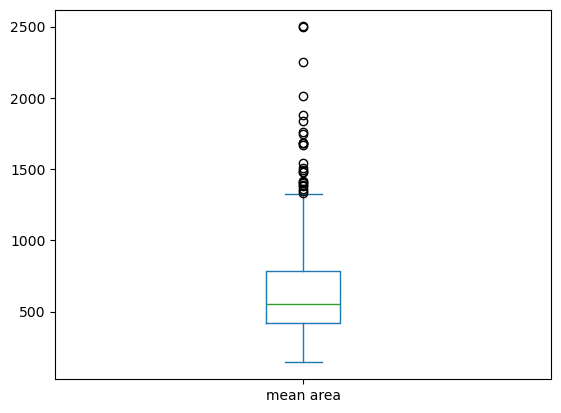

In [17]:
cancer_df['mean area'].plot(kind="box")

In [23]:
q1 = cancer_df['mean area'].quantile(0.25)
q3 = cancer_df['mean area'].quantile(0.75)
iqr = q3-q1

upper_bound = q3+(1.5*iqr)
print("Upper bound", upper_bound)
lower_bound = q1-(1.5*iqr)
print("Lower bound", lower_bound)

outliers = cancer_df[cancer_df['mean area']>upper_bound]
outliers[:3]

Upper bound 1326.3000000000002
Lower bound -123.30000000000001


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
23         21.16         23.04           137.2     1404.0          0.09428   
82         25.22         24.91           171.5     1878.0          0.10630   
108        22.27         19.67           152.8     1509.0          0.13260   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
23             0.1022          0.1097              0.08632         0.1769   
82             0.2665          0.3339              0.18450         0.1829   
108            0.2768          0.4264              0.18230         0.2556   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
23                  0.05278  ...          35.59            188.0      2615.0   
82                  0.06782  ...          33.62            211.7      2562.0   
108                 0.07039  ...          28.01            206.8      2360.0   

     worst smoothness  worst compactness  worst concavity  \
23             0.1401             0.2600           0.3155   
82             0.1573             0.6076           0.6476   
108            0.1701             0.6997           0.9608   

     worst concave points  worst symmetry  worst fractal dimension  target  
23                 0.2009          0.2822                  0.07526       0  
82                 0.2867          0.2355                  0.10510       0  
108                0.2910          0.4055                  0.09789       0  

[3 rows x 31 columns]

In [24]:
cancer_df_wo = cancer_df[~(cancer_df['mean area']>upper_bound)]
cancer_df_wo[:3]

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38           122.8     1001.0          0.11840   
1        20.57         17.77           132.9     1326.0          0.08474   
2        19.69         21.25           130.0     1203.0          0.10960   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33            184.6      2019.0   
1                 0.05667  ...          23.41            158.8      1956.0   
2                 0.05999  ...          25.53            152.5      1709.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  

[3 rows x 31 columns]

In [25]:
cancer_df_wo['mean area'].describe().round()

count     544.0
mean      608.0
std       274.0
min       144.0
25%       413.0
50%       537.0
75%       718.0
max      1326.0
Name: mean area, dtype: float64

In [20]:
cancer_df_wo.shape

(544, 31)

<Axes: >

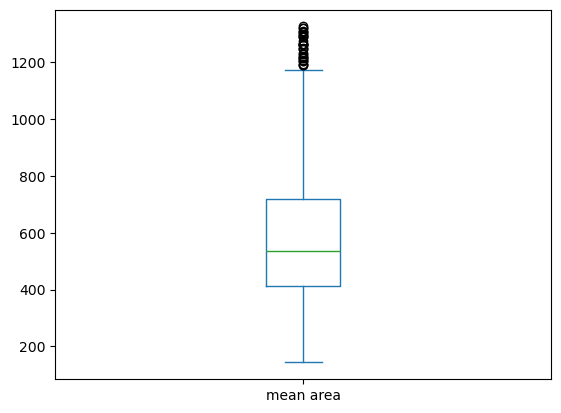

In [21]:
cancer_df_wo['mean area'].plot(kind="box")

<Axes: ylabel='mean area'>

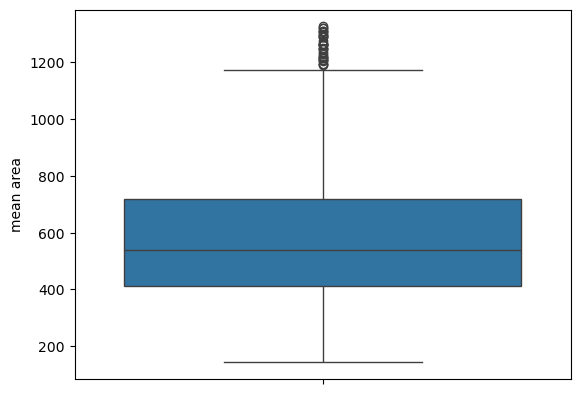

In [22]:
sns.boxplot(cancer_df_wo['mean area'])

We can grab information and arrays out of this dictionary to set up our data frame and understanding of the features:

In [4]:
print(cancer['DESCR'])

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)
        
        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.
 

In [56]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'], 
      dtype='<U23')

## Set up DataFrame

In [12]:
df_feat = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [14]:
cancer['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0,

In [16]:
df_target = pd.DataFrame(cancer['target'],columns=['Cancer'])

Now let's actually check out the dataframe!

In [8]:
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension           ...             worst radius  \
0                 0.07871           ...                    25.38   
1                 0.05667           ...                    24.99   
2                 0.05999           ...                    23.57   
3                 0.09744           ...                    14.91   
4                 0.05883           ...                    22.54   

   worst texture  worst perimeter  worst area  worst smoothness  \
0          17.33           184.60      2019.0            0.1622   
1          23.41           158.80      1956.0            0.1238   
2          25.53           152.50      1709.0            0.1444   
3          26.50            98.87       567.7            0.2098   
4          16.67           152.20      1575.0            0.1374   

   worst compactness  worst concavity  worst concave points  worst symmetry  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   worst fractal dimension  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678  

[5 rows x 30 columns]

# Exploratory Data Analysis



We'll skip the Data Viz part for this lecture since there are so many features that are hard to interpret if you don't have domain knowledge of cancer or tumor cells. In your project you will have more to visualize for the data.

## Train Test Split

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(df_feat, np.ravel(df_target), test_size=0.30, random_state=101)

# Train the Support Vector Classifier

In [59]:
from sklearn.svm import SVC

In [60]:
model = SVC()

In [61]:
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Predictions and Evaluations

Now let's predict using the trained model.

In [27]:
predictions = model.predict(X_test)

In [45]:
from sklearn.metrics import classification_report,confusion_matrix

In [46]:
print(confusion_matrix(y_test,predictions))

[[  0  66]
 [  0 105]]


In [62]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        66
          1       0.61      1.00      0.76       105

avg / total       0.38      0.61      0.47       171



/Users/marci/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Woah! Notice that we are classifying everything into a single class! This means our model needs to have it parameters adjusted (it may also help to normalize the data).

We can search for parameters using a GridSearch!

# Gridsearch

Finding the right parameters (like what C or gamma values to use) is a tricky task! But luckily, we can be a little lazy and just try a bunch of combinations and see what works best! This idea of creating a 'grid' of parameters and just trying out all the possible combinations is called a Gridsearch, this method is common enough that Scikit-learn has this functionality built in with GridSearchCV! The CV stands for cross-validation which is the

GridSearchCV takes a dictionary that describes the parameters that should be tried and a model to train. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested. 

In [63]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [64]:
from sklearn.model_selection import GridSearchCV

One of the great things about GridSearchCV is that it is a meta-estimator. It takes an estimator like SVC, and creates a new estimator, that behaves exactly the same - in this case, like a classifier. You should add refit=True and choose verbose to whatever number you want, higher the number, the more verbose (verbose just means the text output describing the process).

In [65]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

What fit does is a bit more involved then usual. First, it runs the same loop with cross-validation, to find the best parameter combination. Once it has the best combination, it runs fit again on all data passed to fit (without cross-validation), to built a single new model using the best parameter setting.

In [40]:
# May take awhile!
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] gamma=1, C=0.1, kernel=rbf ......................................
[CV] ............. gamma=1, C=0.1, kernel=rbf, score=0.631579 -   0.0s
[CV] gamma=1, C=0.1, kernel=rbf ......................................
[CV] ............. gamma=1, C=0.1, kernel=rbf, score=0.631579 -   0.0s
[CV] gamma=1, C=0.1, kernel=rbf ......................................
[CV] ............. gamma=1, C=0.1, kernel=rbf, score=0.636364 -   0.0s
[CV] gamma=0.1, C=0.1, kernel=rbf ....................................
[CV] ........... gamma=0.1, C=0.1, kernel=rbf, score=0.631579 -   0.0s
[CV] gamma=0.1, C=0.1, kernel=rbf ....................................
[CV] ........... gamma=0.1, C=0.1, kernel=rbf, score=0.631579 -   0.0s
[CV] gamma=0.1, C=0.1, kernel=rbf ....................................
[CV] ........... gamma=0.1, C=0.1, kernel=rbf, score=0.636364 -   0.0s
[CV] gamma=0.01, C=0.1, kernel=rbf ...................................
[CV] .......... 

[Parallel(n_jobs=1)]: Done  31 tasks       | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.8s finished



[CV] gamma=0.0001, C=1000, kernel=rbf ................................
[CV] ....... gamma=0.0001, C=1000, kernel=rbf, score=0.909774 -   0.0s
[CV] gamma=0.0001, C=1000, kernel=rbf ................................
[CV] ....... gamma=0.0001, C=1000, kernel=rbf, score=0.969925 -   0.0s
[CV] gamma=0.0001, C=1000, kernel=rbf ................................
[CV] ....... gamma=0.0001, C=1000, kernel=rbf, score=0.931818 -   0.0s


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'C': [0.1, 1, 10, 100, 1000], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

You can inspect the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best\_estimator_ attribute:

In [41]:
grid.best_params_

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

In [ ]:
grid.best_estimator_

Then you can re-run predictions on this grid object just like you would with a normal model.

In [48]:
grid_predictions = grid.predict(X_test)

In [49]:
print(confusion_matrix(y_test,grid_predictions))

[[ 60   6]
 [  3 102]]


In [50]:
print(classification_report(y_test,grid_predictions))

             precision    recall  f1-score   support

          0       0.95      0.91      0.93        66
          1       0.94      0.97      0.96       105

avg / total       0.95      0.95      0.95       171

